In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df =pd.read_csv('/Users/Chang/Projects/Caravan.csv')

In [3]:
df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [4]:
df.shape

(5822, 86)

## Data Exploration. 
First of all, we can investigate the data through a brief summary of them. By screening the briefs, we know that all the features are numerical in the range from 0 to 10. Plus, a number of features have their upper quantiles at 0, which means that at least 75% of the values in those columns are 0. Our pre-assumption is that those columns with most of the values being 0 may not be very helpful in our predictive model.

In [5]:
df.iloc[:,0:20].describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,0.883545,2.290450,1.887667,3.230333,4.300240,1.461010,3.351254,4.572484,1.895053,0.397973
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,0.965924,1.722645,1.799928,1.619973,2.005283,1.622967,1.761052,2.298125,1.798321,0.775073
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,2.000000,3.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,1.000000,2.000000,2.000000,3.000000,4.000000,1.000000,3.000000,5.000000,2.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,1.000000,3.000000,3.000000,4.000000,6.000000,2.000000,4.000000,6.000000,3.000000,1.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,5.000000


In [6]:
df.iloc[:,21:40].describe()

,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,2.899004,2.219856,2.306424,1.620749,1.606836,2.202508,3.758674,1.067331,4.236860,4.771728,6.040364,1.316386,1.959464,6.277053,2.728959,2.573686,3.536070,2.731364,0.796118
std,1.839675,1.730840,1.692843,1.722882,1.330664,1.529319,1.935568,1.303175,3.089302,3.089837,1.552799,1.203072,1.599714,1.978675,1.981893,2.086099,1.882656,1.927738,1.162829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,2.000000,2.000000,5.000000,0.000000,1.000000,5.000000,1.000000,1.000000,2.000000,1.000000,0.000000
50%,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,4.000000,5.000000,6.000000,1.000000,2.000000,7.000000,2.000000,2.000000,4.000000,3.000000,0.000000
75%,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,5.000000,2.000000,7.000000,7.000000,7.000000,2.000000,3.000000,8.000000,4.000000,4.000000,5.000000,4.000000,1.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [7]:
df.iloc[:,41:60].describe()

,MINKGEM,MKOOPKLA,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,3.784438,4.236345,0.771213,0.040021,0.071625,2.970457,0.048265,0.175369,0.009447,0.020955,0.092580,0.013054,0.215046,0.194778,0.013741,0.015287,0.023531,1.827722,0.000859
std,1.317783,2.007150,0.958623,0.362680,0.499980,2.920669,0.531346,0.897222,0.244675,0.212738,0.603076,0.228906,0.813133,0.898100,0.209260,0.192471,0.375274,1.879290,0.043462
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,4.000000,6.000000,2.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
max,9.000000,8.000000,3.000000,6.000000,4.000000,8.000000,7.000000,7.000000,9.000000,5.000000,6.000000,6.000000,6.000000,9.000000,6.000000,3.000000,7.000000,8.000000,3.000000


In [8]:
df.iloc[:,61:85].describe()

,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,5822.000000,5822.00000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,0.025249,0.01563,0.047578,0.402954,0.014772,0.020611,0.562178,0.010477,0.041051,0.002233,...,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256
std,0.156894,0.20456,0.409016,0.492631,0.134133,0.142092,0.604767,0.129991,0.228974,0.062819,...,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,6.00000,5.000000,2.000000,5.000000,1.000000,7.000000,4.000000,8.000000,3.000000,...,8.000000,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000


In [9]:
df.AINBOED.value_counts()

0    5777
1      44
2       1
Name: AINBOED, dtype: int64

Our next thing to do is to randomly shuffle the indexes and the columns.

In [10]:
df = df.sample(frac=1)

In [11]:
df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
2409,38,1,3,2,9,0,6,3,0,9,...,0,0,0,0,0,0,0,0,0,No
1603,41,1,3,3,10,0,7,1,2,8,...,0,0,0,1,0,0,0,0,0,No
166,29,1,3,4,7,2,4,0,4,7,...,0,0,0,1,0,0,0,0,0,No
2988,33,1,2,4,8,0,8,0,1,7,...,0,0,0,0,0,0,0,0,0,No
890,35,1,2,4,8,2,5,1,2,8,...,0,0,0,1,0,0,0,0,0,No


## Split data into train set and test set; factorize the "Purchse" column

In [12]:
df = df.reset_index(drop=True)

In [13]:
from sklearn.cross_validation import train_test_split

In [14]:
np.random.seed(88)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:85],df.iloc[:,85],test_size = 0.2)

In [16]:
X_train.shape

(4657, 85)

In [17]:
X_test.shape

(1165, 85)

In [18]:
y_train.shape

(4657,)

In [19]:
y_test.shape

(1165,)

In [20]:
y_train = y_train.factorize()[0]

In [21]:
y_test = y_test.factorize()[0]

## Classification
Here, we first tried KNN, which gives nearly 95% accuracy. However, the model fails to predict any of the positive cases of 'Purchase'. Also, a ROC Curve is ploted to show the performance of the model. The AUC of 0.66 indicates a poor-performanced model, which does not well seperate the positive cases from the negative cases.

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.grid_search import GridSearchCV
from sklearn import neighbors
import statsmodels.api as sm

In [23]:
knn = neighbors.KNeighborsClassifier()

In [24]:
parameters = {'n_neighbors': np.arange(2,20)}

In [25]:
clf = GridSearchCV(knn, parameters, cv=4, scoring = 'roc_auc')

In [26]:
clf.fit(X_train,y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [27]:
clf.grid_scores_

[mean: 0.52307, std: 0.01209, params: {'n_neighbors': 2},
 mean: 0.54259, std: 0.01832, params: {'n_neighbors': 3},
 mean: 0.54920, std: 0.02532, params: {'n_neighbors': 4},
 mean: 0.55603, std: 0.01909, params: {'n_neighbors': 5},
 mean: 0.56254, std: 0.01480, params: {'n_neighbors': 6},
 mean: 0.57647, std: 0.00855, params: {'n_neighbors': 7},
 mean: 0.58714, std: 0.00910, params: {'n_neighbors': 8},
 mean: 0.59440, std: 0.00493, params: {'n_neighbors': 9},
 mean: 0.60572, std: 0.00947, params: {'n_neighbors': 10},
 mean: 0.61393, std: 0.01914, params: {'n_neighbors': 11},
 mean: 0.62626, std: 0.01637, params: {'n_neighbors': 12},
 mean: 0.63149, std: 0.01883, params: {'n_neighbors': 13},
 mean: 0.63163, std: 0.01093, params: {'n_neighbors': 14},
 mean: 0.63246, std: 0.01669, params: {'n_neighbors': 15},
 mean: 0.63276, std: 0.01731, params: {'n_neighbors': 16},
 mean: 0.63587, std: 0.01615, params: {'n_neighbors': 17},
 mean: 0.63940, std: 0.02103, params: {'n_neighbors': 18},
 mean

In [28]:
y_hat = clf.predict(X_test)

In [29]:
accuracy_score(y_hat, y_test)

0.93648068669527895

In [30]:
confusion_matrix(y_hat,y_test)

array([[1105,   60],
       [   0,    0]])

In [31]:
from sklearn.metrics import roc_curve, auc

In [33]:
best_clf = clf.best_estimator_

In [36]:
y_hat_proba = best_clf.predict_proba(X_test)

In [38]:
y_hat_proba[:,1]

array([ 0.05555556,  0.        ,  0.11111111, ...,  0.        ,
        0.05555556,  0.05555556])

In [39]:
fpr, tpr, thresholds = roc_curve(y_test,y_hat_proba[:,1])

In [45]:
roc_auc = auc(fpr,tpr)

In [46]:
roc_auc

0.65518853695324286

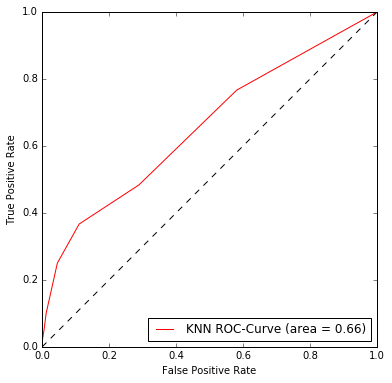

In [50]:
fit =plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,label ='KNN ROC-Curve (area = %0.2f)'% roc_auc, c='r')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

Our next model to try is Logistic Regression. The confusion matrix shows only 3 cases were classified by this model as "positive" while 2 of them are actually "negative". ROC Curve shows a AUC of 0.74, which is slightly better than the KNN model, but not significant enough.

In [43]:
from sklearn.linear_model import LogisticRegression

In [45]:
X_sm= sm.add_constant(X_train)

In [46]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [55]:
model = LogisticRegression()

In [56]:
model.fit(X_sm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
parameters = {'solver': ['newton-cg','lbfgs','liblinear','sag']}
clf = GridSearchCV(model, parameters, cv = 5)
clf.fit(X_sm, y_train)

//anaconda/envs/gads/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda/envs/gads/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda/envs/gads/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda/envs/gads/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda/envs/gads/lib/python3.5/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached w

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [59]:
clf.grid_scores_

[mean: 0.93966, std: 0.00177, params: {'solver': 'newton-cg'},
 mean: 0.94009, std: 0.00130, params: {'solver': 'lbfgs'},
 mean: 0.93966, std: 0.00177, params: {'solver': 'liblinear'},
 mean: 0.94009, std: 0.00130, params: {'solver': 'sag'}]

In [66]:
y_hat = clf.predict(X_sm)

In [67]:
confusion_matrix(y_hat, y_train)

array([[4379,  270],
       [   4,    4]])

In [78]:
X_sm_test = sm.add_constant(X_test)

In [80]:
X_sm_test.shape

(1165, 85)

In [96]:
X_sm_test = sm.add_constant(X_test, has_constant='add')

In [97]:
y_hat = clf.predict(X_sm_test)

In [98]:
confusion_matrix(y_hat,y_test)

array([[1089,   73],
       [   2,    1]])

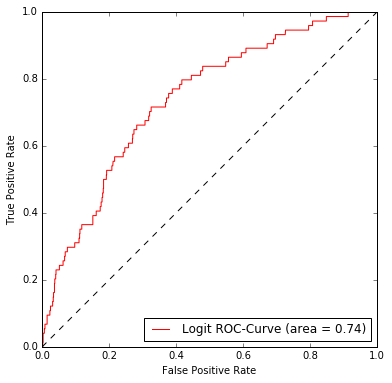

In [100]:
from sklearn.metrics import roc_curve, auc
best_clf = clf.best_estimator_
y_hat_proba = best_clf.predict_proba(X_sm_test)
fpr, tpr, threshholds = roc_curve(y_test, y_hat_proba[:,1])
roc_auc = auc(fpr,tpr)
fit =plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,label ='Logit ROC-Curve (area = %0.2f)'% roc_auc, c='r')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

## Feature Engineering
In this part, we will try some feature engineering and see if we can improve our model, to generate better seperation between positive cases and negative cases.

First of all, we will identify the features which contains more than 75% zeros in them. These are features of less signal and can be eliminated. As a result, we generate a new data set "df1" with only 49 features.

In [124]:
summ = df.describe()

In [125]:
dd = []
for i in range(0,85):
    if summ.iloc[6,i]==0:
        dd.append(summ.columns[i])
    

In [128]:
df1 = df.drop(dd,axis=1)


In [130]:
df1.shape

(5822, 49)

Next, we will identify colinearity within the features and decorrelate those redundant features. Here, we will first normalize the data sets and then perform a PCA on it. We will reduce it from 49 features to 4 features. Then a Logistic regression will be applied on the transformed data to see if there is any improvement. The resulted confusion matrix shows that the model still classified all the cases as "negative", probably due to the fact that the data sets is highly imbalanced.

In [134]:
from sklearn.preprocessing import StandardScaler

In [135]:
X = df1.values

In [142]:
X = X[:,0:48]

In [143]:
scale = StandardScaler()

In [144]:
X = scale.fit_transform(X)

//anaconda/envs/gads/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
//anaconda/envs/gads/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [148]:
covmat = X.T.dot(X)

In [149]:
covmat.shape

(48, 48)

In [155]:
covmat

array([[  5.82200000e+03,  -2.25435162e+02,  -1.28066335e+02, ...,
         -1.91756550e+02,  -4.81740223e+01,  -6.70235219e+01],
       [ -2.25435162e+02,   5.82200000e+03,   5.88152579e+01, ...,
          2.47615998e+02,  -1.71324276e+02,   3.81078708e+00],
       [ -1.28066335e+02,   5.88152579e+01,   5.82200000e+03, ...,
         -2.55701281e+02,   1.19921875e+02,  -5.39639368e+01],
       ..., 
       [ -1.91756550e+02,   2.47615998e+02,  -2.55701281e+02, ...,
          5.82200000e+03,   7.69215399e+02,   3.05807060e+03],
       [ -4.81740223e+01,  -1.71324276e+02,   1.19921875e+02, ...,
          7.69215399e+02,   5.82200000e+03,   1.50450254e+02],
       [ -6.70235219e+01,   3.81078708e+00,  -5.39639368e+01, ...,
          3.05807060e+03,   1.50450254e+02,   5.82200000e+03]])

In [158]:
evs, evmat = linalg.eig(covmat)

In [161]:
evs.shape

(48,)

In [162]:
evmat.shape

(48, 48)

In [168]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=4)
X_PCA = sklearn_pca.fit_transform(X)

In [171]:
X_PCA.shape

(5822, 4)

In [175]:
y = df1.iloc[:,48].factorize()[0]

In [176]:
X_train,X_test,y_train,y_test = train_test_split(X_PCA,y,test_size = 0.2)

In [177]:
X_train.shape

(4657, 4)

In [178]:
y_train.shape

(4657,)

In [179]:
model = LogisticRegression()
parameters = {'solver': ['newton-cg','lbfgs','liblinear','sag']}
clf = GridSearchCV(model, parameters, cv = 5)
clf.fit(X_train, y_train)
clf.grid_scores_

[mean: 0.94009, std: 0.00039, params: {'solver': 'newton-cg'},
 mean: 0.94009, std: 0.00039, params: {'solver': 'lbfgs'},
 mean: 0.94009, std: 0.00039, params: {'solver': 'liblinear'},
 mean: 0.94009, std: 0.00039, params: {'solver': 'sag'}]

In [180]:
y_hat = clf.predict(X_test)

In [181]:
confusion_matrix(y_hat,y_test)

array([[1096,   69],
       [   0,    0]])